<a href="https://colab.research.google.com/github/yuriarciniegas/yoaprendo1/blob/master/WhatsAppCineColombianoAzureBot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step 1. Load the Azure ML Web Service**

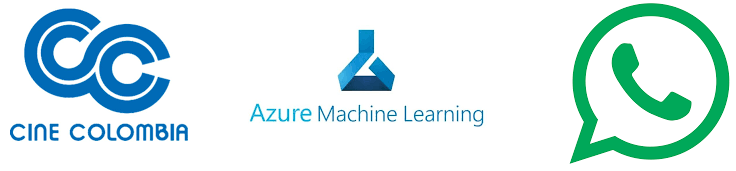

In [ ]:
!killall ngrok

In [ ]:
import urllib.request
import json
import pandas as pd

def movieSentiment(text):
  data = {
        "Inputs": {
                "input1":
                [
                    {
                            'Texto': text,
                    }
                ],
        },
    "GlobalParameters":  {
    }
  }

  body = str.encode(json.dumps(data))

  url = 'https://ussouthcentral.services.azureml.net/workspaces/10e79c68d4e4474da2b053d20f57d893/services/8d5e5d62a5d24badb428a6a39d310981/execute?api-version=2.0&format=swagger'
  api_key = 'YrPcM2gSTmDNF7ki+a1Wvbj+/WO9A1FSid5Cb34aG/Fi3V8EM2zgUr0TGFHL3Z53w6SiuOnzRJ5J+AMChLE4kQ==' # Replace this with the API key for the web service
  headers = {'Content-Type':'application/json', 'Authorization':('Bearer '+ api_key)}

  req = urllib.request.Request(url, body, headers)

  try:
    response = urllib.request.urlopen(req)
    result = response.read().decode('utf-8')
    print(result)
    if "MALA" in result:
      return "MALA"
    else:
      return "BUENA"
  except urllib.error.HTTPError as error:
    print("The request failed with status code: " + str(error.code))

    # Print the headers - they include the requert ID and the timestamp, which are useful for debugging the failure
    print(error.info())
    print(json.loads(error.read().decode("utf8", 'ignore')))


In [ ]:
print(movieSentiment("son malas, tratan de narcotrafico y violencia"))
#print(movieSentiment("son buenas peliculas"))


**Step 2: Install require libraries**

In [ ]:
!pip install twilio flask requests flask-ngrok

**Step 3: It's necessary log in with ngrok.**

In [ ]:
#Sign in with fran.romero.academico google account
!mkdir -p /drive/ngrok-ssh
%cd /drive/ngrok-ssh
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip -O ngrok-stable-linux-amd64.zip
!unzip -u ngrok-stable-linux-amd64.zip
!cp /drive/ngrok-ssh/ngrok /ngrok
!chmod +x /ngrok

#If neccesary, replace this authtoken

#Commented for security.
#!/ngrok authtoken 2N7Sn84o08UazbVA4jSDT97WpEs_6Ze4BW4U9V42fiCgbxr7W


**Step 4: Launch the web service**

In [ ]:
from flask import Flask, request
import requests
from twilio.twiml.messaging_response import Message, MessagingResponse
from flask_ngrok import run_with_ngrok

app = Flask(__name__)
run_with_ngrok(app)

@app.route('/bot', methods=['POST'])
def bot():
    incoming_msg = request.values.get('Body', '').lower()
    print("\n===========================")
    print("MENSAJE RECIBIDO: ", incoming_msg)
    print("===========================")
    response  = MessagingResponse()
    msg = response.message()
    responded = False

    if "MALA" in movieSentiment(incoming_msg):
       msg_text = "Es un pena que no te gusten las películas colombianas."
       msg.media('https://seeklogo.com/images/C/cine-colombia-logo-E9FACC96DF-seeklogo.com.png')
       msg.body(msg_text)
       responded = True

    if "BUENA" in movieSentiment(incoming_msg):
        msg_text = "Nos alegra mucho que te gusten las películas colombianas."
        msg.body(msg_text)
        msg.media('https://seeklogo.com/images/C/cine-colombia-logo-E9FACC96DF-seeklogo.com.png')
        responded = True

    if not responded:
        msg.body('No pudimos procesar su solicitud.')
    return str(response)

if __name__ == '__main__':
    app.run()